In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rc
from analysis import Data,Cuts,Plots

In [3]:
# open data files

input_sig = "tchannel_13TeV_met800_mchitilde800"
input_bkg_zjj = "zjj_13TeV_met800"

sig = Data(input_sig)
bkg_zjj = Data(input_bkg_zjj)

sig.data.head()

,mt,met,mj1,mj2,mjj,dphi_jj,dphi_min,eta_j1,eta_j2,deta_jj,num_tracks_jet,nSub11,nSub12,nSub21,nSub22
evt,,,,,,,,,,,,,,,
0,2028.60,881.436,53.7077,25.5860,986.144,3.114140,0.035128,-0.727899,-0.755306,0.027408,38,35.1511,22.1332,14.72020,7.49077
1,2853.11,972.406,55.7029,43.1953,1966.780,3.047310,0.044871,-0.148357,0.992342,1.140700,52,29.1483,18.1152,28.26110,20.10510
2,1748.44,813.161,57.9759,10.0842,633.369,2.972620,0.105680,0.768329,-0.947171,1.715500,35,38.0832,23.9525,8.41887,5.55729
3,1959.33,934.167,48.0836,15.2435,654.130,3.085900,0.017396,0.157837,1.029310,0.871473,35,32.2820,19.3846,11.92010,9.25652
4,2371.63,897.050,334.2680,50.5865,472.451,0.052885,3.125610,0.158553,0.480538,0.321985,64,48.6448,40.9491,27.36570,16.42230


In [4]:
print sig.data.columns.values

['mt' 'met' 'mj1' 'mj2' 'mjj' 'dphi_jj' 'dphi_min' 'eta_j1' 'eta_j2'
 'deta_jj' 'num_tracks_jet' 'nSub11' 'nSub12' 'nSub21' 'nSub22']


In [5]:
sig.cuts

No cuts have been defined

In [6]:
ct = Cuts()
Cuts.append(ct,'met>880 & num_tracks_jet>40')

sig.select(ct)

In [7]:
print len(sig.data_)
print len(sig.data)

5000
2351


In [8]:
ct = Cuts()
Cuts.cuts_ = ''
sig.select(ct)

In [9]:
print len(sig.data_)
print len(sig.data)

5000
5000


In [24]:
sig.get_obj('jet',0) # select leading jet
sig.get_obj('jet',1).head() # select subleading jet

,pt,m,eta,phi
evt,,,,
0,217.5890,25.5860,-0.755306,4.70250
1,456.3660,43.1953,0.992342,4.32292
3,87.9105,15.2435,1.029310,3.12404
8,108.7050,22.4616,-0.102321,0.16913
9,237.6100,26.0035,-1.142330,2.21993


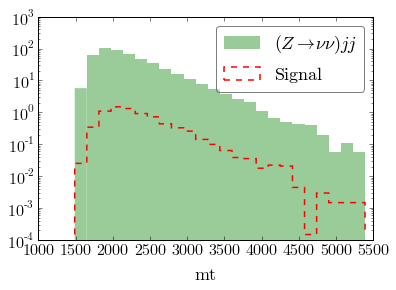

In [11]:
plts = Plots()
plts.hist_var('mt',sig,[bkg_zjj],[r"$(Z\rightarrow\nu\nu)jj$"])

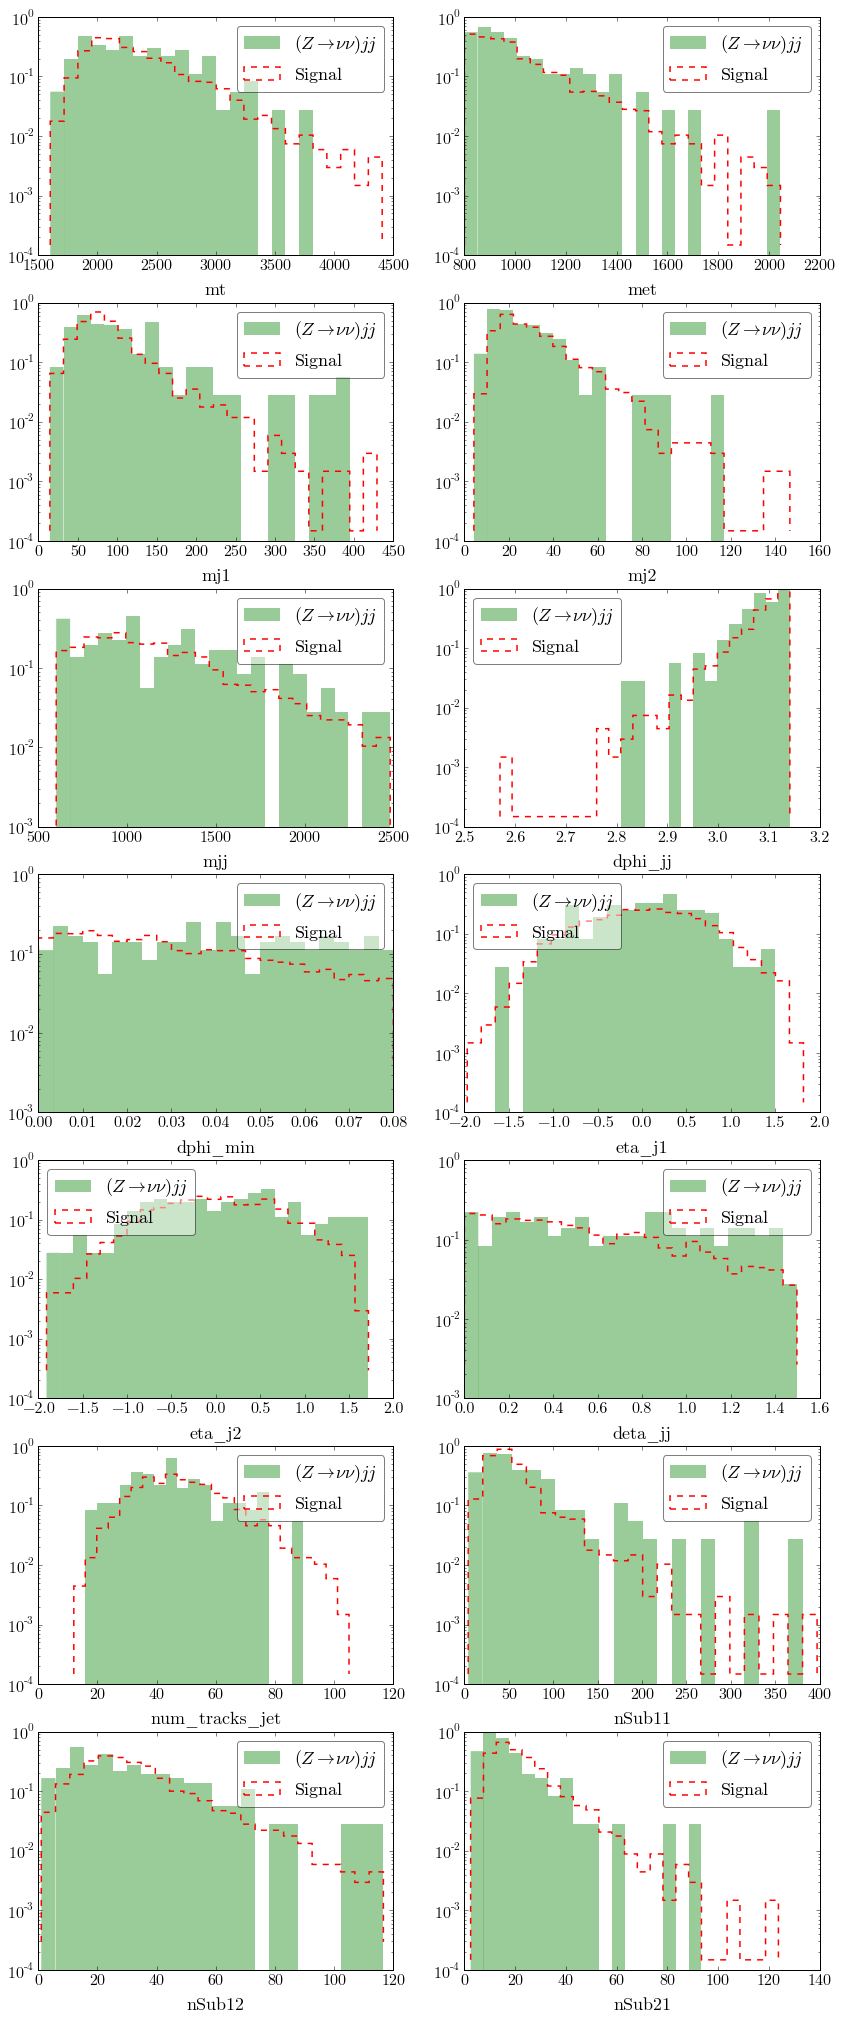

In [23]:
plts.hist_all(sig,[bkg_zjj],[r"$(Z\rightarrow\nu\nu)jj$"])

In [15]:
ct = Cuts()
Cuts.append(ct,'dphi_min < .08 & mjj < 2500 & mjj > 600 & deta_jj < 1.5')

sig.select(ct)
bkg_zjj.select(ct)

In [19]:
print sig.eff()
print sig.n_evts()
print bkg_zjj.eff()
print bkg_zjj.n_evts()

0.3614
692.09907
0.0070341987876
195.213788173


In [21]:
lambda_y = .55

print "Signal efficiency:",  sig.eff()
print "Background efficiency:",  bkg_zjj.eff()
print
Nsigevt = (lambda_y**4)*sig.n_evts()
Nbkgevt = bkg_zjj.n_evts()
print "Signal events expected in 1 /ab:", Nsigevt
print "Background events expected in 1 /ab:", Nbkgevt

Signal efficiency: 0.3614
Background efficiency: 0.0070341987876

Signal events expected in 1 /ab: 63.3313905242
Background events expected in 1 /ab: 195.213788173


## Event display

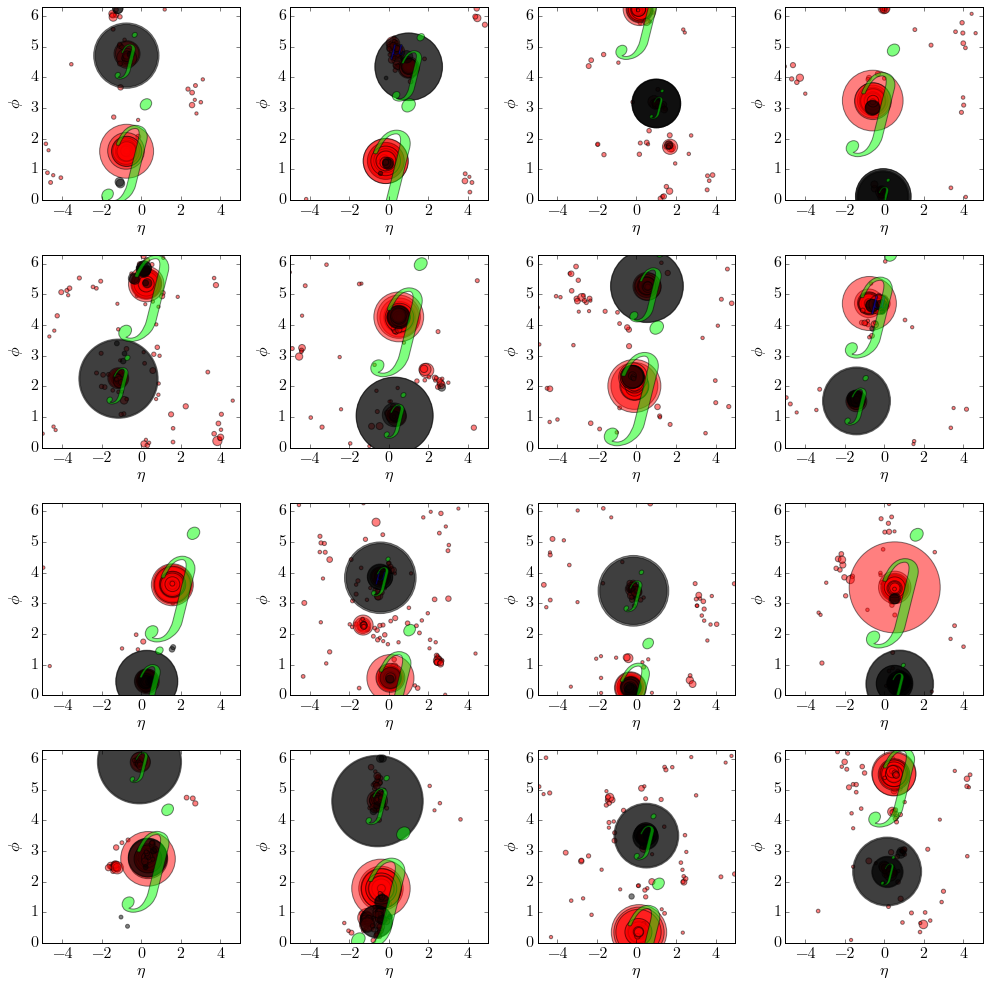

In [24]:
plts.event_display(sig)

## Limits and stuff

In [24]:
# Open data files simulating events in that last ATLAS MET bin control region

input_sig_100 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi100")
input_sig_200 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi200")
input_sig_400 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi400")
input_sig_600 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi600")
input_sig_800 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi800")
input_sig_1000 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi1000")
input_sig_2000 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi2000")
input_sig_3000 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi3000")

In [25]:
pb = 1;
ab = 10**-6*pb;
nevents=4.


lambda_excl_ATLAS=[]
lambda_excl_ATLAS.append((nevents/(input_sig_100.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_200.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_400.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_600.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_800.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_1000.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_2000.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_3000.meta['cxn'][0]*pb*((.02)/ab)))**.25)

m_excl_ATLAS=[]
m_excl_ATLAS=[100,200,400,600,800,1000,2000,3000]

In [26]:
# Open data files simulating events for CMS13 with MET > 800 GeV and some basic cuts

input_sig_100 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde100")
input_sig_400 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde400")
input_sig_600 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde600")
input_sig_800 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde800")
input_sig_1000 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde1000")
input_sig_2000 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde2000")
input_sig_3000 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde3000")

input_bkg = Data("./CMS_13/zjj_13TeV_met800")

In [27]:
# Apply some basic cuts

cut = 'dphi_min < .08 & mjj < 2500 & mjj > 600 & deta_jj < 1.5'

input_sig_100.select(cut)
input_sig_400.select(cut)
input_sig_600.select(cut)
input_sig_800.select(cut)
input_sig_1000.select(cut)
input_sig_2000.select(cut)
input_sig_3000.select(cut)

input_bkg.select(cut)

In [42]:
def signif(sig, bkg,name_sig,name_bkg, sign):
    
    sigEff = len(sig.data)/len(Data(name_sig).data)
    bkgEff = len(bkg.data)/len(Data(name_bkg).data)

    nsig = sig.meta['cxn'][0]*pb*(1/ab)*sigEff
    nbkg = bkg.meta['cxn'][0]*pb*(1/ab)*bkgEff


    func = lambda lamb: (((lamb**4)*nsig)/np.sqrt((lamb**4)*nsig+nbkg)) - sign
    from scipy.optimize import fsolve
    return fsolve(func, 1)[0]

In [44]:
lambda_excl_13=[]
lambda_excl_13.append(signif(input_sig_100,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde100","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_400,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde400","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_600,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde600","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_800,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde800","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_1000,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde1000","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_2000,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde2000","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_3000,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde3000","./CMS_13/zjj_13TeV_met800",3))

m_excl_13=[]
m_excl_13=[100,400,600,800,1000,2000,3000]

In [32]:
GeV = 10**6;
eV = 10**-9*GeV;
KeV = 10**-6*GeV;
MeV = 10**-3*GeV;
TeV = 10**3*GeV;

Sec = (1/(6.582119*10**-16))/eV; 
Kmps = 3.3356*10**-6;
Centimeter = 5.0677*10**13/GeV;
mm = 0.1*Centimeter;
Meter = 100*Centimeter;
Km = 10**5*Centimeter;
Kilogram = 5.6085*10**35*eV;
Day = 86400*Sec;
Year = 365*Day;
KgDay = Kilogram*Day;
amu = 1.66053892*10**-27*Kilogram;
Mpc = 3.086*10**24*Centimeter;

def lambda_excl_disp(m_chi): 
    return ((32*np.pi/(3*4))*(m_chi*GeV)**4/((5*MeV)**2*(20*GeV)**3*1*mm))**0.25

def lambda_excl_jj(m_chi): 
    return (8*np.pi*.1**5*m_chi/175)**0.5

In [33]:
m_disp = np.linspace(100,3000,100) # 100 linearly spaced numbers
lambda_disp = lambda_excl_disp(m_disp) 

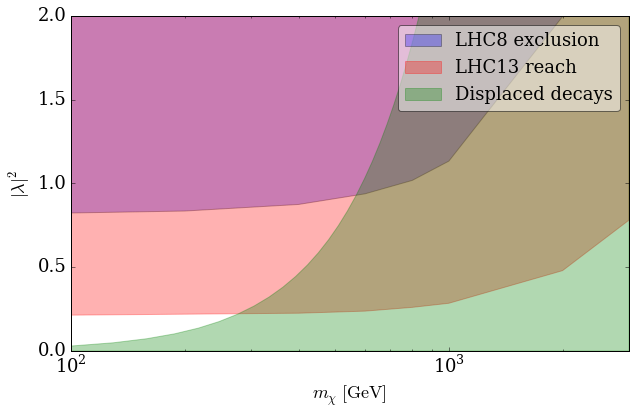

In [45]:
plt.rcParams['figure.figsize'] = 10., 6

plt.fill_between(m_excl_ATLAS,np.square(lambda_excl_ATLAS),100,alpha=0.3, label="LHC8 exclusion")
plt.fill_between(m_excl_13,np.square(lambda_excl_13),100,alpha=0.3, color="red", label="LHC13 reach")
plt.fill_between(m_disp,np.square(lambda_disp),0,alpha=0.3, color="green", label="Displaced decays")

plt.xscale("log")
plt.ylabel("$|\lambda|^2$")
plt.yscale("linear")


plt.xlabel(r"$m_{\chi}$ $\rm[GeV]$ ")
plt.xlim(100,3000)
plt.ylim(0,2)
#plt.yscale("log")
plt.legend(loc='best', fancybox=True, framealpha=0.5)
#plt.savefig("tchannel_limits_displaced.pdf")